<a href="https://colab.research.google.com/github/panos-sam/Data_Mining/blob/main/DataMiningProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project 1
> Samlidis Panagiotis | 1115201500250

Here we mount our drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


We import all the necessary libraries for our needs.

In [ ]:
import pandas as pd
from pandas import DataFrame
import datetime
from datetime import datetime
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

We set a path in order to read a .csv file and make a dataframe with the given .csv

In [ ]:
path="/content/gdrive/MyDrive/DataMining/marketing_campaign.csv"

df=pd.read_csv(path, sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#**TASK 1**
Προεπεξεργασία/Καθάρισμα: Ελέγξτε αν υπάρχουν τιμές που λείπουν στα δεδομένα και χειριστείτε τις ανάλογα, μετατρέψτε στήλες που αφορούν ημερομηνίες σε DateTime objects και ελέγξτε αν υπάρχουν και κάποια χαρακτηριστικά dtype: object τα οποία μπορείτε να κωδικοποιήσετε/μετατρέψετε σε αριθμητικές τιμές (5%).

Check if there are values missing in the data

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Fill those missing values with 0

In [ ]:
df = df.fillna(0)

NameError: ignored

Check if the previous line of code filled those values

In [ ]:
df.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Check if there are columns that their values refer to dates and if there are change them to datetime objects

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The column Dt_Customer should be a date time object so we change it

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

Check if it changed correctly.

In [ ]:
df['Dt_Customer'].dtypes

dtype('<M8[ns]')

All the objects that we can transform into numerical values will be transformed on TASK 7.

#**TASK 2**
Εκτυπώστε τις μοναδικές τιμές στα κατηγορικά χαρακτηριστικά Marital_Status και
Education για να αποκτήσετε μια πιο σαφή εικόνα των δεδομένων. Αλλάξτε τις τιμές
[Alone,Absurd,YOLO] των Marital_Status με την τιμή ‘Single’. Χρησιμοποιήστε όποιο
τύπο γραφήματος θέλετε για να παρουσιάσετε το πλήθος των τιμών σε κάθε κατηγορία.
(5%)

Print the unique values of columns "Education" and "Marital_Status"

In [ ]:
print("Education :",df.Education.unique())
print("Marital Status :",df.Marital_Status.unique())

Education : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital Status : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Change the values [Alone,Absurd,YOLO] into "Single"

In [ ]:
df['Marital_Status'].replace(['Alone','Absurd','YOLO'],['Single','Single','Single'],inplace=True)

Check again the unique values of "Marital_Status"

In [ ]:
print("Marital Status :",df.Marital_Status.unique())

Marital Status : ['Single' 'Together' 'Married' 'Divorced' 'Widow']


Get the count of each column

In [ ]:
education_counts = df['Education'].value_counts()
marital_status_counts = df['Marital_Status'].value_counts()

NameError: ignored

Create the bar plot for the 2 Columns

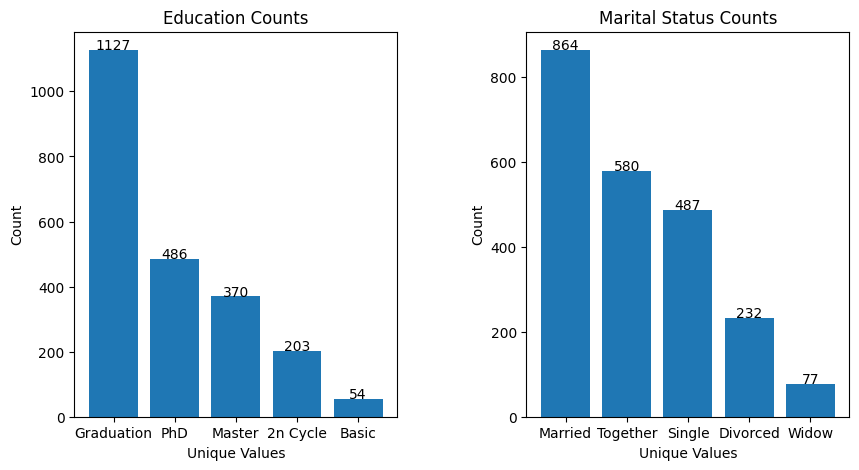

In [ ]:
# Create a bar plot of the value counts
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.bar(education_counts.index, education_counts.values)
ax1.set_xlabel('Unique Values')
ax1.set_ylabel('Count')
ax1.set_title('Education Counts')

# Add counts as text labels on the bars
for i, count in enumerate(education_counts.values):
    ax1.text(i, count + 1, str(count), ha='center')


ax2.bar(marital_status_counts.index, marital_status_counts.values)
ax2.set_xlabel('Unique Values')
ax2.set_ylabel('Count')
ax2.set_title('Marital Status Counts')

# Add counts as text labels on the bars
for i, count in enumerate(marital_status_counts.values):
    ax2.text(i, count + 1, str(count), ha='center')

fig.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

#**TASK 3**
Δημιουργία νέων χαρακτηριστικών: (10%)

Α. Δημιουργία ενός χαρακτηριστικού ("Customer_For") που αντιπροσωπεύει τον αριθμό των ημερών που οι πελάτες άρχισαν να ψωνίζουν στο κατάστημα σε σχέση με την τελευταία καταγεγραμμένη ημερομηνία (Recency).

Β. Εξαγωγή της ηλικίας "Age" ενός πελάτη με βάση το "Year_Birth" που υποδεικνύει το έτος γέννησης του αντίστοιχου ατόμου.

Γ. Δημιουργήστε ένα άλλο χαρακτηριστικό "Spent" που υποδεικνύει το συνολικό ποσό
που ξόδεψε ο πελάτης σε όλες τις κατηγορίες σε διάστημα δύο ετών.

Δ. Δημιουργήστε ένα χαρακτηριστικό "Παιδιά" για να δηλώσετε το σύνολο των παιδιών σε ένα νοικοκυριό, δηλαδή τα παιδιά και τους εφήβους.

Ε. Για να αποκτήσετε περαιτέρω σαφήνεια του νοικοκυριού, δημιουργήστε ένα
χαρακτηριστικό με ένδειξη "Family_Size" που δείχνει το συνολικό αριθμό των ατόμων σε ένα νοικοκυριό

Στ. Δημιουργήστε ένα χαρακτηριστικό "Is_Parent" που δηλώνει αν ένας πελάτης είναι και γονιός

Ζ. Δημιουργήστε ένα άλλο χαρακτηριστικό "Living_With" χρησιμοποιώντας το
"Marital_Status" για να εξάγετε την κατάσταση διαβίωσης των ζευγαριών. Συγκεκριμένα το χαρακτηριστικό αυτό πρέπει να έχει δύο τιμές, "Partner" και "Alone".

Η. Δημιουργήστε τη στήλη “Age Group” χρησιμοποιώντας τη στήλη “Age”, η οποία να
ομαδοποιεί τις ηλικίες στις παρακάτω τιμές "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80".

Check how many columns our dataframe has.

In [ ]:
for (idx, column) in zip(range(len(df.columns)), df.columns):
  print(idx, column)

0 ID
1 Year_Birth
2 Education
3 Marital_Status
4 Income
5 Kidhome
6 Teenhome
7 Dt_Customer
8 Recency
9 MntWines
10 MntFruits
11 MntMeatProducts
12 MntFishProducts
13 MntSweetProducts
14 MntGoldProds
15 NumDealsPurchases
16 NumWebPurchases
17 NumCatalogPurchases
18 NumStorePurchases
19 NumWebVisitsMonth
20 AcceptedCmp3
21 AcceptedCmp4
22 AcceptedCmp5
23 AcceptedCmp1
24 AcceptedCmp2
25 Complain
26 Z_CostContact
27 Z_Revenue
28 Response


**A.** Create column 'Customer_For'

In [ ]:
df.insert(9, 'Customer_For', [ (np.datetime64('today') - np.timedelta64(Recency, 'D') - Dt_Customer).days for (Dt_Customer, Recency) in zip(df['Dt_Customer'], df['Recency']) ])
df['Customer_For'].head()

0    3834
1    3304
2    3515
3    3342
4    3296
Name: Customer_For, dtype: int64

**B.** Create column 'Age'

In [ ]:
import datetime

today = datetime.date.today()

df.insert(2,'Age',[today.year - Year_Birth for Year_Birth in df['Year_Birth']])
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,66,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,69,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,58,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,39,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,42,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0


**C.** Create column 'Spent'

In [ ]:
df['Spent'] = df.apply(lambda row: row['MntWines'] + row['MntFruits'] + row['MntMeatProducts'] + row['MntFishProducts'] + row['MntSweetProducts'] + row['MntGoldProds'], axis=1)
col = df.pop('Spent')
df.insert(17, 'Spent', col)
df['Spent'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

**D.** Create column 'Children'

In [ ]:
df['Children'] = df.apply(lambda row: row['Kidhome'] + row['Teenhome'],axis=1)
col = df.pop('Children')
df.insert(6, 'Children', col)
df[['Children','Kidhome','Teenhome']].head()

,Children,Kidhome,Teenhome
0,0,0,0
1,2,1,1
2,0,0,0
3,1,1,0
4,1,1,0


**E.** Create column 'Family_Size'

In [ ]:
df['Family_Size'] = df.apply(lambda row: row['Children'] + 2 if row['Marital_Status'] == 'Married' or row['Marital_Status'] == 'Together' else row['Children'] + 1,axis=1 )
col = df.pop('Family_Size')
df.insert(5, 'Family_Size', col)
df['Family_Size'].head()

0    1
1    3
2    2
3    3
4    3
Name: Family_Size, dtype: int64

**F.** Create columns 'Is_Parent'

In [ ]:
df['Is_Parent'] = df.apply(lambda row: 'Yes' if row['Children'] > 0 else 'No', axis =1  )
col = df.pop('Is_Parent')
df.insert(6, 'Is_Parent', col)
df['Is_Parent'].head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Is_Parent, dtype: object

**G.** Create column 'Living_With'

In [ ]:
df['Living_With'] = df.apply(lambda row: 'Partner' if row['Marital_Status'] == 'Together' or row['Marital_Status'] == 'Married' else 'Alone',axis = 1)
col = df.pop('Living_With')
df.insert(5, 'Living_With', col)
df['Living_With'].head()

0      Alone
1      Alone
2    Partner
3    Partner
4    Partner
Name: Living_With, dtype: object

**H.** Create column 'Age_Group'

In [ ]:
df['Age_Group'] = df.apply(lambda row :
                           '21-30' if row['Age'] < 31 else
                           '31-40' if row['Age'] < 41 else
                           '41-50' if row['Age'] < 51 else
                           '51-60' if row['Age'] < 61 else
                           '61-70' if row['Age'] < 71 else
                           '71-80' if row['Age'] < 81 else
                           '>80',axis = 1)
col = df.pop('Age_Group')
df.insert(3, 'Age_Group', col)
df[['Age','Age_Group']].head()

,Age,Age_Group
0,66,61-70
1,69,61-70
2,58,51-60
3,39,31-40
4,42,41-50


This is the new number of columns, and all the new columns placed near their corresponding fields.For example 'Age_Group' is near column 'Age' and so on..

In [ ]:
for (idx, column) in zip(range(len(df.columns)), df.columns):
  print(idx, column)

0 ID
1 Year_Birth
2 Age
3 Age_Group
4 Education
5 Marital_Status
6 Living_With
7 Family_Size
8 Is_Parent
9 Income
10 Children
11 Kidhome
12 Teenhome
13 Dt_Customer
14 Recency
15 Customer_For
16 MntWines
17 MntFruits
18 MntMeatProducts
19 MntFishProducts
20 MntSweetProducts
21 MntGoldProds
22 Spent
23 NumDealsPurchases
24 NumWebPurchases
25 NumCatalogPurchases
26 NumStorePurchases
27 NumWebVisitsMonth
28 AcceptedCmp3
29 AcceptedCmp4
30 AcceptedCmp5
31 AcceptedCmp1
32 AcceptedCmp2
33 Complain
34 Z_CostContact
35 Z_Revenue
36 Response


#TASK 4
Ελέγξτε αν υπάρχουν ακραίες τιμές στα χαρακτηριστικά και διαγράψτε τις από τα
δεδομένα. (5%)

Use describe() to get a better view of the data.

In [ ]:
df.describe()

,ID,Year_Birth,Age,Family_Size,Income,Children,Kidhome,Teenhome,Recency,Customer_For,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,54.194196,2.595089,51687.459375,0.950446,0.444196,0.506250,49.109375,3533.472768,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,11.984069,0.906959,25609.342730,0.751803,0.538398,0.544538,28.962453,203.482758,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3132.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,46.000000,2.000000,34722.000000,0.000000,0.000000,0.000000,24.000000,3358.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,53.000000,3.000000,51075.000000,1.000000,0.000000,0.000000,49.000000,3534.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,64.000000,3.000000,68289.750000,1.000000,1.000000,1.000000,74.000000,3707.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,130.000000,5.000000,666666.000000,3.000000,2.000000,2.000000,99.000000,3923.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
print(df)

         ID  Year_Birth  Age Age_Group   Education Marital_Status Living_With  \
0      5524        1957   66     61-70  Graduation         Single       Alone   
1      2174        1954   69     61-70  Graduation         Single       Alone   
2      4141        1965   58     51-60  Graduation       Together     Partner   
3      6182        1984   39     31-40  Graduation       Together     Partner   
4      5324        1981   42     41-50         PhD        Married     Partner   
...     ...         ...  ...       ...         ...            ...         ...   
2235  10870        1967   56     51-60  Graduation        Married     Partner   
2236   4001        1946   77     71-80         PhD       Together     Partner   
2237   7270        1981   42     41-50  Graduation       Divorced       Alone   
2238   8235        1956   67     61-70      Master       Together     Partner   
2239   9405        1954   69     61-70         PhD        Married     Partner   

      Family_Size Is_Parent

**There are 2240 rows in our dataframe**

Possible columns that may have outliers are stored in outliers_list

In [ ]:
outliers_list = ['Year_Birth',
                 'Income',
                 'MntWines',
                 'MntFruits',
                 'MntMeatProducts',
                 'MntFishProducts',
                 'MntSweetProducts',
                 'MntGoldProds',
                 'NumDealsPurchases',
                 'NumWebPurchases',
                 'NumCatalogPurchases',
                 'NumStorePurchases',
                 'NumWebVisitsMonth']

filterd_col = df[outliers_list]

#Find the z_scores of all the filtered columns
z_scores = np.abs((filterd_col - filterd_col.mean()) / filterd_col.std())

# Find rows where any column has an absolute z-score greater than 3
threshold = 3.0
outlier_rows = (z_scores > threshold).any(axis=1)

# Remove the rows that contain outliers
df = df.loc[~outlier_rows]

# Print the DataFrame with outliers removed
print(df)


        ID  Year_Birth  Age Age_Group   Education Marital_Status Living_With  \
0     5524        1957   66     61-70  Graduation         Single       Alone   
1     2174        1954   69     61-70  Graduation         Single       Alone   
2     4141        1965   58     51-60  Graduation       Together     Partner   
3     6182        1984   39     31-40  Graduation       Together     Partner   
4     5324        1981   42     41-50         PhD        Married     Partner   
...    ...         ...  ...       ...         ...            ...         ...   
2234  8372        1974   49     41-50  Graduation        Married     Partner   
2236  4001        1946   77     71-80         PhD       Together     Partner   
2237  7270        1981   42     41-50  Graduation       Divorced       Alone   
2238  8235        1956   67     61-70      Master       Together     Partner   
2239  9405        1954   69     61-70         PhD        Married     Partner   

      Family_Size Is_Parent   Income  .

**There are 1978 rows in our dataframe after we removed the outlier rows.** **There were 262 outliers in our dataframe**

#TASK 5
Στη συνέχεια, εξετάστε τη συσχέτιση μεταξύ των χαρακτηριστικών με ένα heatmap
διάγραμμα. (Εξαιρώντας τα κατηγορικά χαρακτηριστικά σε αυτό το σημείο) (5%)

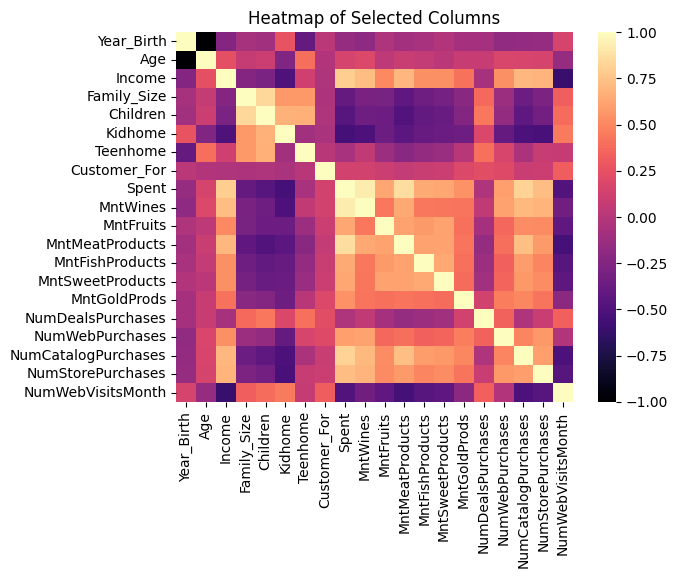

In [ ]:
#This is a list of all the columns we are gonna use for our heatmap diagram
heatmap_list = ['Year_Birth','Age',
                'Income','Family_Size',
                'Children','Kidhome',
                'Teenhome','Customer_For',
                'Spent','MntWines',
                'MntFruits','MntMeatProducts',
                'MntFishProducts','MntSweetProducts',
                'MntGoldProds','NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases',
                'NumStorePurchases','NumWebVisitsMonth']

# Create a heatmap using the Seaborn library
sns.heatmap(df[heatmap_list].corr(),xticklabels=True, yticklabels=True, cmap='magma')

# Set the title of the heatmap
plt.title("Heatmap of Selected Columns")

# Show the plot
plt.show()

#TASK 6
Ερωτήματα που θα απαντηθούν με γραφήματα - επιλέξτε 10 από τα παρακάτω. (20%)

##6.1. Σε ποιά κατηγορία Marital_Status ανήκει το μεγαλύτερο ποσοστό των πελατών της εταιρείας;

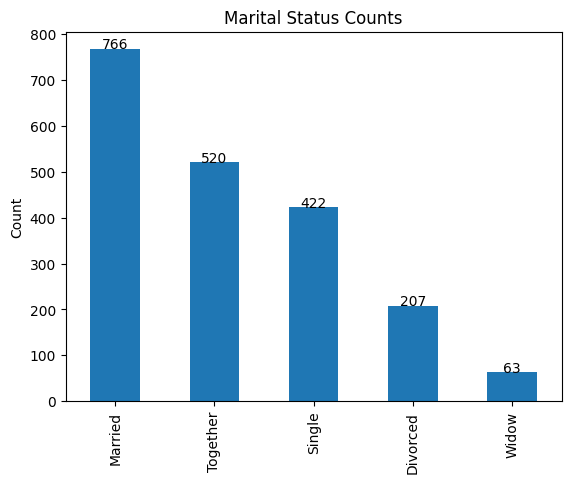

In [ ]:
#The count of Marital_Status Column
marital_status_counts = df['Marital_Status'].value_counts()

# Create a bar plot of the value counts
ax = (marital_status_counts).plot.bar()

plt.ylabel('Count')
plt.title('Marital Status Counts')

# Add counts as text labels on the bars
for i, count in enumerate(marital_status_counts.values):
    ax.text(i, count + 1, str(count), ha='center')

# Show the plot
plt.show()

The largest percentage of the company's clients belong to 'Married" category

## 6.2. Πόσοι πελάτες έχουν κάνει Complain ;

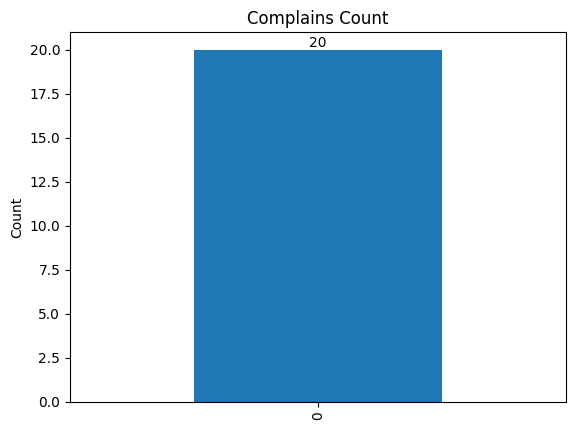

In [ ]:
# Extract the column you want to check
complaints = df['Complain']

# Calculate the sum of values greater than 0
sum_complaints = pd.Series(complaints[complaints > 0].sum())

# Create a bar plot of the sum of values greater than 0
ax = (sum_complaints).plot.bar()

for i, count in enumerate(sum_complaints.values):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.title('Complains Count')
plt.ylabel('Count')

# Show the plot
plt.show()

##6.5. Τι σχέση έχει η ηλικία Age Group με το χαρακτηριστικό Spent των αγορών;

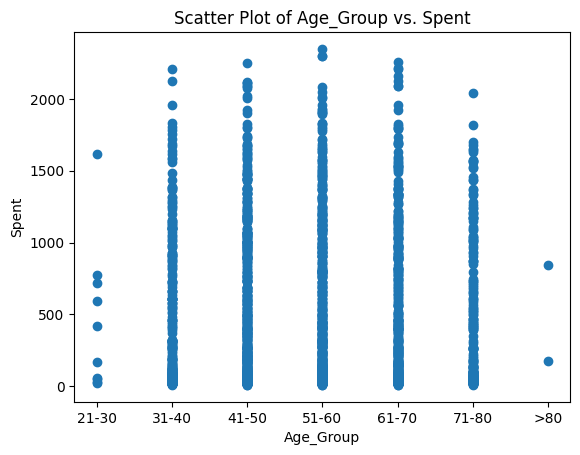

In [ ]:
col1 = sorted(df['Age_Group'])
col2 = df['Spent']

# Create a scatter plot of the two columns
plt.scatter(col1, col2)
plt.xlabel('Age_Group')
plt.ylabel('Spent')
plt.title('Scatter Plot of Age_Group vs. Spent')
plt.show()

We can see that the youngest and the eldest age group does not spend as much as the middle age groups

##6.6. Τι σχέση έχει το εισόδημα Income με το χαρακτηριστικό Spent των αγορών;

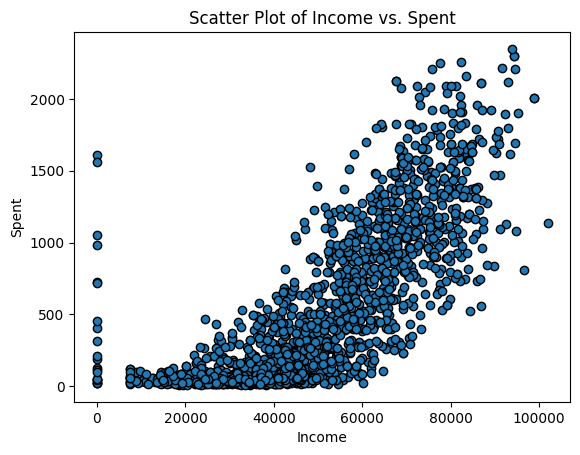

In [ ]:
col1 = df['Income']
col2 = df['Spent']

# Create a scatter plot of the two columns
plt.scatter(col1, col2,edgecolor = 'black')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Scatter Plot of Income vs. Spent')
plt.show()

The more money someone earns the more money she/he spends

##6.7. Ποια είναι η σχέση μεταξύ της εκπαίδευσης και του εισοδήματος;

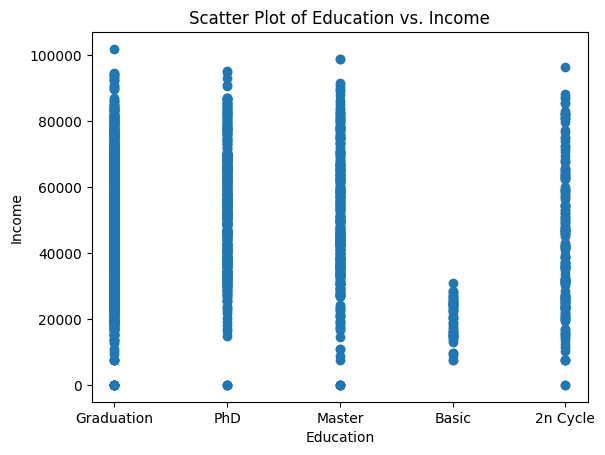

In [ ]:
col1 = df['Education']
col2 = df['Income']

# Create a scatter plot of the two columns
plt.scatter(col1, col2)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Scatter Plot of Education vs. Income')
plt.show()

All Education categories earn relatively the same except for the 'Basic' Education level

##6.8. Ποια είναι η σχέση μεταξύ του εισοδήματος και του μεγέθους της οικογένειας;

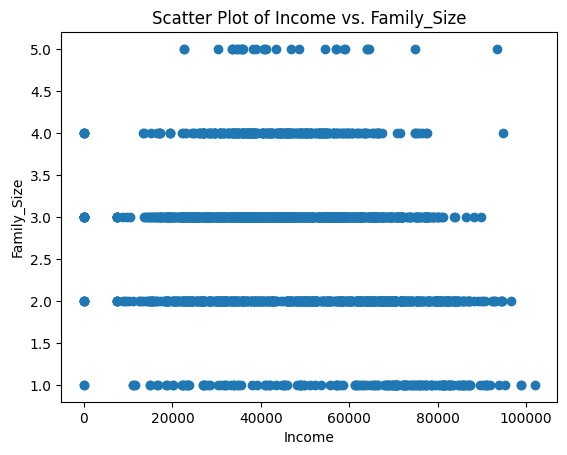

In [ ]:
col1 = df['Income']
col2 = df['Family_Size']

# Create a scatter plot of the two columns
plt.scatter(col1, col2)
plt.xlabel('Income')
plt.ylabel('Family_Size')
plt.title('Scatter Plot of Income vs. Family_Size')
plt.show()

Families that are more than 3 members tend to earn less than those with 3 or fewer members

##6.14. Σχεδιάστε το ιστόγραμμα για τη στήλη NumDealsPurchases.

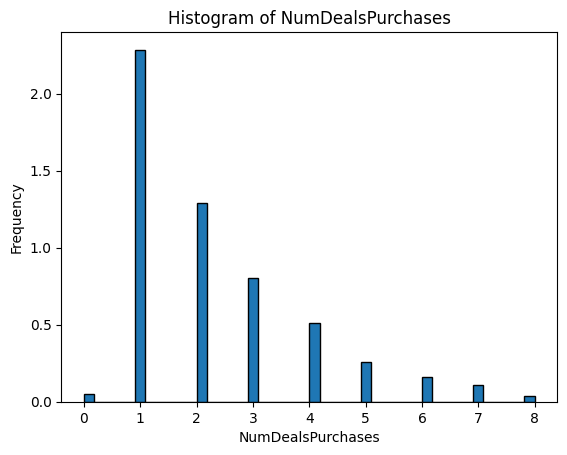

In [ ]:

#The method that is commented out is not quite good for our needs, but it is a well known method used for calculating the bins for a histogram

# Calculate the interquartile range (IQR)
#q1 = np.percentile(df['Kidhome'], 25)
#q3 = np.percentile(df['Kidhome'], 75)
#qr = q3 - q1

# Calculate the number of bins using the Freedman-Diaconis rule
#n = len(df['Kidhome'])
#bins = int(2 * iqr / (n ** (1/3)))

n = len(df['NumDealsPurchases'])
bins = int(n ** 0.5)

# Create the histogram
plt.hist(df['NumDealsPurchases'], bins=bins, density='True' , edgecolor='black')

# Add labels and title
plt.xlabel('NumDealsPurchases')
plt.ylabel('Frequency')
plt.title('Histogram of NumDealsPurchases')


# Display the histogram
plt.show()

##6.15. Σχεδιάστε το ιστόγραμμα για τη στήλη Income.

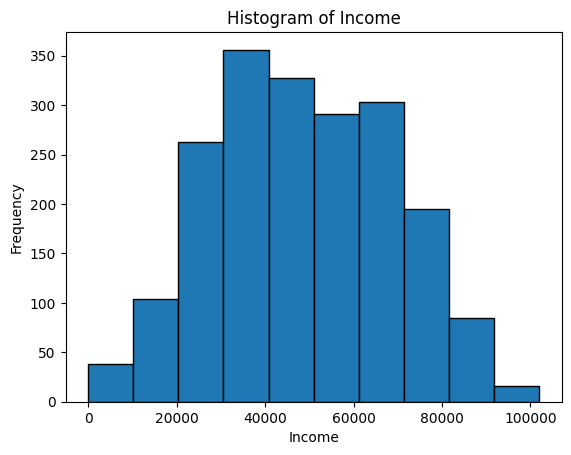

In [ ]:
# Create the histogram

# Calculate the interquartile range (IQR)
#q1 = np.percentile(df['Income'], 25)
#q3 = np.percentile(df['Income'], 75)
#iqr = q3 - q1

# Calculate the number of bins using the Freedman-Diaconis rule
#n = len(df['Income'])
#bins = int(2 * iqr / (n ** (1/3)))

#n = len(df['NumDealsPurchases'])
#bins = int(n ** 0.5)


# Create the histogram
plt.hist(df['Income'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')

# Display the histogram
plt.show()

##6.16. Σχεδιάστε το ιστόγραμμα για τη στήλη Kidhome.

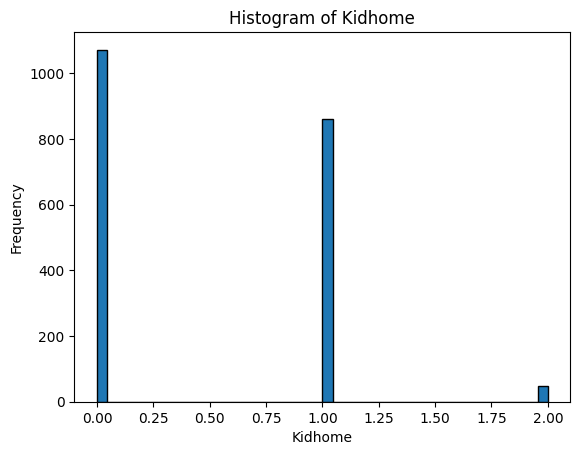

In [ ]:
# Calculate the interquartile range (IQR)
#q1 = np.percentile(df['Kidhome'], 25)
#q3 = np.percentile(df['Kidhome'], 75)
#qr = q3 - q1

# Calculate the number of bins using the Freedman-Diaconis rule
#n = len(df['Kidhome'])
#bins = int(2 * iqr / (n ** (1/3)))

n = len(df['Kidhome'])
bins = int(n ** 0.5)

# Create the histogram
plt.hist(df['Kidhome'], bins=bins, edgecolor='black')

# Add labels and title
plt.xlabel('Kidhome')
plt.ylabel('Frequency')
plt.title('Histogram of Kidhome')


# Display the histogram
plt.show()

##6.17. Σχεδιάστε το ιστόγραμμα για τη στήλη Family_Size.

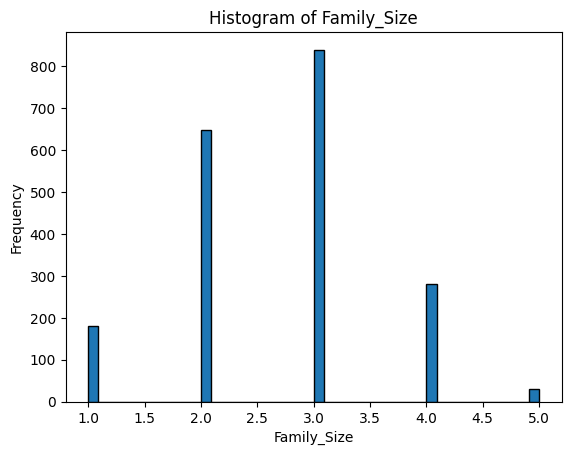

In [ ]:
# Calculate the interquartile range (IQR)
#q1 = np.percentile(df['Kidhome'], 25)
#q3 = np.percentile(df['Kidhome'], 75)
#qr = q3 - q1

# Calculate the number of bins using the Freedman-Diaconis rule
#n = len(df['Kidhome'])
#bins = int(2 * iqr / (n ** (1/3)))

n = len(df['Family_Size'])
bins = int(n ** 0.5)

# Create the histogram
plt.hist(df['Family_Size'], bins=bins, edgecolor='black')

# Add labels and title
plt.xlabel('Family_Size')
plt.ylabel('Frequency')
plt.title('Histogram of Family_Size')


# Display the histogram
plt.show()

#TASK 7
Principal component analysis (PCA) (25%): Σε αυτό το πρόβλημα, υπάρχουν πολλοί
παράγοντες βάσει των οποίων γίνεται μία ταξινόμηση. Αυτοί οι παράγοντες είναι βασικά χαρακτηριστικά ή γνωρίσματα. Όσο μεγαλύτερος είναι ο αριθμός των χαρακτηριστικών, τόσο πιο δύσκολη είναι η εργασία. Πολλά από αυτά τα χαρακτηριστικά είναι συσχετισμένα και, ως εκ τούτου, περιττά. Αυτός είναι ο λόγος για τον οποίο θα πραγματοποιήσετε μείωση της διάστασης στα επιλεγμένα χαρακτηριστικά. Η μείωση της διάστασης είναι η διαδικασία μείωσης
του αριθμού των υπό εξέταση τυχαίων μεταβλητών, και έχει ώς αποτέλεσμα την απόκτηση ενός συνόλου κύριων μεταβλητών.
Οι μεταβλητές στο σύνολο δεδομένων που αφορούν κατηγορίες και όχι αριθμητικές τιμές, μετά και τις προσθήκες χαρακτηριστικών που έγιναν στα προηγούμενα ερωτήματα είναι οι παρακάτω ['Education','Marital_Status','Living_With'].

Για αυτές τις μεταβλητές θα χρησιμοποιήσετε τον LabelEncoder() ώστε να μετατραπούν σε αριθμητικά δεδομένα (η διαδικασία ονομάζεται one hot encoding).

Στη συνέχεια δημιουργήστε ένα αντίγραφο του dataframe το οποίο θα περιέχει όλες τις αριθμητικές στήλες και διαγράψτε τις στήλες που σχετίζονται με προσφορές και προωθητικές ενέργειες, δηλαδή τις ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'].
Έτσι, τα δεδομένα που έχουν προκύψει περιέχουν χαρακτηριστικά διαφόρων διαστάσεων και διακυμάνσεων. Οι διαφορετικές διακυμάνσεις των χαρακτηριστικών των δεδομένων επηρεάζουν αρνητικά τη μοντελοποίηση ενός συνόλου δεδομένων. Η λύση είναι να γίνει αυτό που ονομάζεται Standardization έτσι ώστε κάθε στήλη/χαρακτηριστικό/μεταβλητή να έχει μ = 0 και σ = 1.
Τέλος χρησιμοποιήστε την μέθοδο συμπίεσης Principal Component Analysis (PCA) για να μειώσετε τις διαστάσεις σε n_components=3. Σχεδιάστε την (τρισδιάστατη) προβολή του αποτελέσματος.

In [ ]:
df

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Living_With,Family_Size,Is_Parent,Income,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,66,61-70,Graduation,Single,Alone,1,No,58138.0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,69,61-70,Graduation,Single,Alone,3,Yes,46344.0,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,58,51-60,Graduation,Together,Partner,2,No,71613.0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,39,31-40,Graduation,Together,Partner,3,Yes,26646.0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,42,41-50,PhD,Married,Partner,3,Yes,58293.0,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,49,41-50,Graduation,Married,Partner,3,Yes,34421.0,...,7,0,0,0,0,0,0,3,11,0
2236,4001,1946,77,71-80,PhD,Together,Partner,5,Yes,64014.0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,42,41-50,Graduation,Divorced,Alone,1,No,56981.0,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,67,61-70,Master,Together,Partner,3,Yes,69245.0,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
# Create an instance of LabelEncoder
le = LabelEncoder()

#These are the columns we want to use the LabelEncoder()
# Encode the column you want to transform
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Living_With'] = le.fit_transform(df['Living_With'])
df['Is_Parent'] = le.fit_transform(df['Is_Parent'])
df['Age_Group'] = le.fit_transform(df['Age_Group'])

df[['Education','Marital_Status','Living_With','Is_Parent','Age_Group']]

,Education,Marital_Status,Living_With,Is_Parent,Age_Group
0,2,2,0,0,4
1,2,2,0,1,4
2,2,3,1,0,3
3,2,3,1,1,1
4,4,1,1,1,2
...,...,...,...,...,...
2234,2,1,1,1,2
2236,4,3,1,1,5
2237,2,0,0,0,2
2238,3,3,1,1,4


In [ ]:
df_copy = df.copy()
df_copy

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Living_With,Family_Size,Is_Parent,Income,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,66,4,2,2,0,1,0,58138.0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,69,4,2,2,0,3,1,46344.0,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,58,3,2,3,1,2,0,71613.0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,39,1,2,3,1,3,1,26646.0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,42,2,4,1,1,3,1,58293.0,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,49,2,2,1,1,3,1,34421.0,...,7,0,0,0,0,0,0,3,11,0
2236,4001,1946,77,5,4,3,1,5,1,64014.0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,42,2,2,0,0,1,0,56981.0,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,67,4,3,3,1,3,1,69245.0,...,3,0,0,0,0,0,0,3,11,0


Remove the non numerical value columns

In [ ]:
df_copy.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Complain','Response','Dt_Customer'], axis=1, inplace=True)

In [ ]:
df_copy

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Living_With,Family_Size,Is_Parent,Income,...,MntSweetProducts,MntGoldProds,Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,66,4,2,2,0,1,0,58138.0,...,88,88,1617,3,8,10,4,7,3,11
1,2174,1954,69,4,2,2,0,3,1,46344.0,...,1,6,27,2,1,1,2,5,3,11
2,4141,1965,58,3,2,3,1,2,0,71613.0,...,21,42,776,1,8,2,10,4,3,11
3,6182,1984,39,1,2,3,1,3,1,26646.0,...,3,5,53,2,2,0,4,6,3,11
4,5324,1981,42,2,4,1,1,3,1,58293.0,...,27,15,422,5,5,3,6,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,49,2,2,1,1,3,1,34421.0,...,2,9,30,1,1,0,2,7,3,11
2236,4001,1946,77,5,4,3,1,5,1,64014.0,...,0,8,444,7,8,2,5,7,3,11
2237,7270,1981,42,2,2,0,0,1,0,56981.0,...,12,24,1241,1,2,3,13,6,3,11
2238,8235,1956,67,4,3,3,1,3,1,69245.0,...,30,61,843,2,6,5,10,3,3,11


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1978 non-null   int64  
 1   Year_Birth           1978 non-null   int64  
 2   Age                  1978 non-null   int64  
 3   Age_Group            1978 non-null   int64  
 4   Education            1978 non-null   int64  
 5   Marital_Status       1978 non-null   int64  
 6   Living_With          1978 non-null   int64  
 7   Family_Size          1978 non-null   int64  
 8   Is_Parent            1978 non-null   int64  
 9   Income               1978 non-null   float64
 10  Children             1978 non-null   int64  
 11  Kidhome              1978 non-null   int64  
 12  Teenhome             1978 non-null   int64  
 13  Recency              1978 non-null   int64  
 14  Customer_For         1978 non-null   int64  
 15  MntWines             1978 non-null   i

Standardize our columns in our df copy

In [ ]:
# create a StandardScaler object
scaler = StandardScaler()

# select all columns to be standardized
cols_to_standardize = df_copy.columns

# apply standardization to selected columns
df_copy[cols_to_standardize] = scaler.fit_transform(df_copy[cols_to_standardize])

df_copy


,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Living_With,Family_Size,Is_Parent,Income,...,MntSweetProducts,MntGoldProds,Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,-0.021997,-1.030040,1.030040,0.953771,-0.370480,0.254725,-1.363225,-1.879674,-1.791232,0.467715,...,2.202449,1.173964,2.051426,0.446848,1.570364,2.986959,-0.497731,0.684927,0.0,0.0
1,-1.054870,-1.288520,1.288520,0.953771,-0.370480,0.254725,-1.363225,0.383257,0.558275,-0.117892,...,-0.632653,-0.725618,-0.896675,-0.184936,-1.114321,-0.504429,-1.127617,-0.225547,0.0,0.0
2,-0.448404,-0.340762,0.340762,0.120485,-0.370480,1.198258,0.733555,-0.748209,-1.791232,1.136788,...,0.019094,0.108344,0.492084,-0.816720,1.570364,-0.116497,1.391927,-0.680784,0.0,0.0
3,0.180878,1.296273,-1.296273,-1.546086,-0.370480,1.198258,0.733555,0.383257,0.558275,-1.095956,...,-0.567478,-0.748784,-0.848467,-0.184936,-0.730794,-0.892361,-0.497731,0.229690,0.0,0.0
4,-0.083661,1.037794,-1.037794,-0.712800,1.403877,-0.688808,0.733555,0.383257,0.558275,0.475411,...,0.214619,-0.517128,-0.164286,1.710417,0.419785,0.271435,0.132155,-0.225547,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,0.856100,0.434676,-0.434676,-0.712800,-0.370480,-0.688808,0.733555,0.383257,0.558275,-0.709905,...,-0.600066,-0.656121,-0.891113,-0.816720,-1.114321,-0.892361,-1.127617,0.684927,0.0,0.0
2236,-0.491569,-1.977798,1.977798,1.787056,1.403877,1.198258,0.733555,2.646188,0.558275,0.759475,...,-0.665240,-0.679287,-0.123494,2.973985,1.570364,-0.116497,-0.182788,0.684927,0.0,0.0
2237,0.516331,1.037794,-1.037794,-0.712800,-0.370480,-1.632341,-1.363225,-1.879674,-1.791232,0.410266,...,-0.274192,-0.308637,1.354265,-0.816720,-0.730794,0.271435,2.336755,0.229690,0.0,0.0
2238,0.813860,-1.116200,1.116200,0.953771,0.516699,1.198258,0.733555,0.383257,0.558275,1.019210,...,0.312381,0.548491,0.616312,-0.184936,0.803311,1.047299,1.391927,-1.136021,0.0,0.0


In [ ]:
# create a PCA object with n_components=3
pca = PCA(n_components=3)

# fit the PCA object to the DataFrame
pca.fit(df_copy)

# transform the DataFrame to the new coordinate system
df_transformed = pca.transform(df_copy)

Create a 3D plot for the PCA method

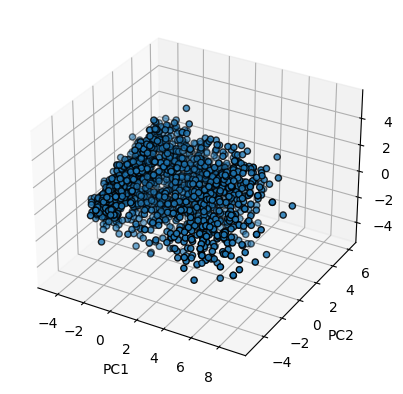

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_transformed[:, 0]
y = df_transformed[:, 1]
z = df_transformed[:, 2]

ax.scatter(x, y, z,edgecolor = 'black')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

#TASK 8
Υλοποίηση Συσταδοποίησης (Clustering) (25%)
Βήματα

● Μέθοδος ELBOW για τον προσδιορισμό του αριθμού των συστάδων που πρέπει να
σχηματιστούν

● Συσταδοποίηση μέσω συσσωρευτικής συσταδοποίησης (Agglomerative και K-Means)

● Εμφάνιση των σχηματιζόμενων συστάδων μέσω διαγράμματος (πχ scatter plot).

##ELBOW METHOD for number of clusters needed

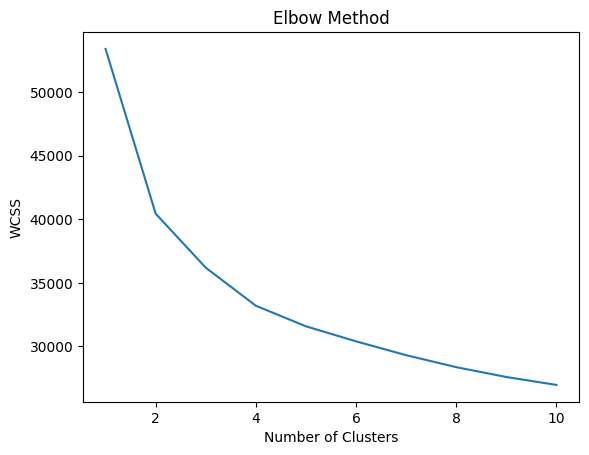

In [ ]:
# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_copy)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters (k) to find the elbow point
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Here we see that the optimal number of clusters is 5 or 4 we will use 5 for better demonstration

---



##K-Means Clustering method

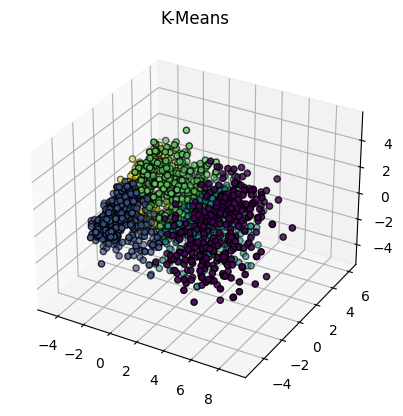

In [ ]:
#kmeans1 = KMeans(n_clusters=4, random_state=0).fit(df_transformed)
kmeans1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
ykm = kmeans1.fit_predict(df_copy)
# Create a 3D scatter plot of the data points with color-coded clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_transformed[:,0], df_transformed[:,1], df_transformed[:,2], c=ykm, edgecolor = 'black')
#ax.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1],kmeans1.cluster_centers_[:, 2], marker='x', s=100, linewidths=3, color='r')
plt.title('K-Means')
plt.show()

##Agglomerative clustering method

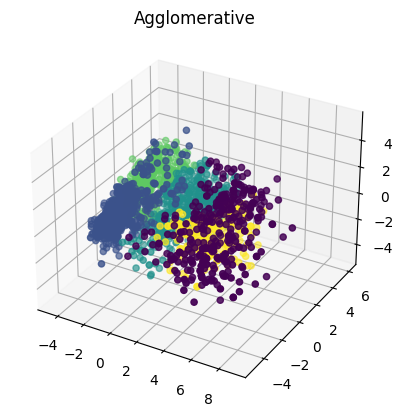

In [ ]:
# Apply agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
cluster_labels = agg_clustering.fit_predict(df_transformed)

# Visualize the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_transformed[:, 0]
y = df_transformed[:, 1]
z = df_transformed[:, 2]

ax.scatter(x, y, z, c=cluster_labels)

plt.title('Agglomerative')
plt.show()